<a href="https://colab.research.google.com/github/hussamshakarnah1/Computer-Vision/blob/master/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# for plottng
import matplotlib.pyplot as plt
import seaborn as sns
# note that ';' is used as the separator between columns (features)
df = pd.read_csv('/content/bank-full.csv',sep=';')

In [ ]:
# show few rows, columns and the class label
df[['age','job','education','y']].head()

,age,job,education,y
0,58,management,tertiary,no
1,44,technician,secondary,no
2,33,entrepreneur,secondary,no
3,47,blue-collar,unknown,no
4,33,unknown,unknown,no


In [ ]:
 # print the size of the dataset
print(f'The dataset has {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset has 45211 rows, and 17 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
numerical_vals = ['age','balance','day','duration','campaign','pdays','previous']

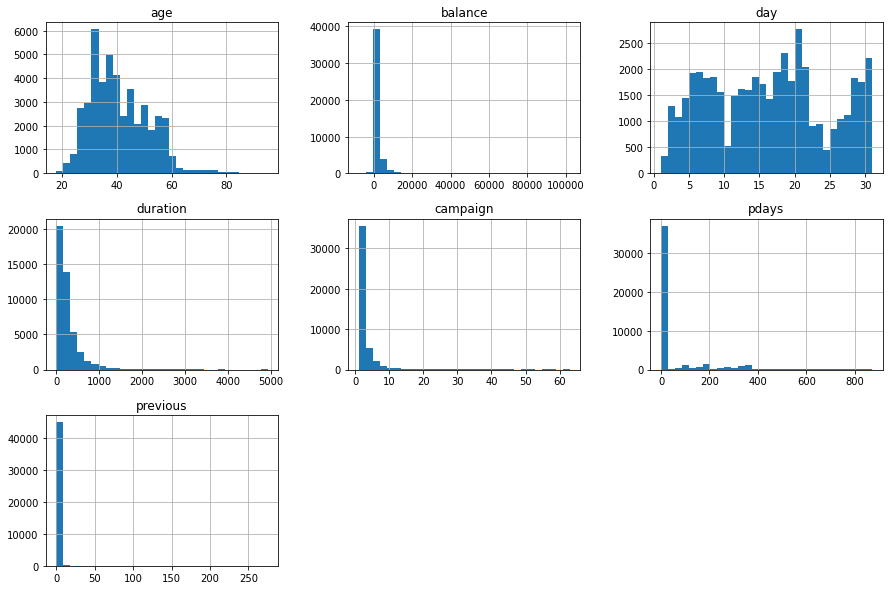

In [ ]:
df[numerical_vals].hist(bins=30,figsize=(15,10))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


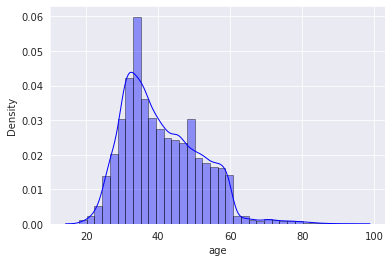

In [ ]:
sns.set_style(style="darkgrid")
sns.distplot(df['age'], hist=True, kde=True,
bins=int(180/5), color = 'blue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 1})
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


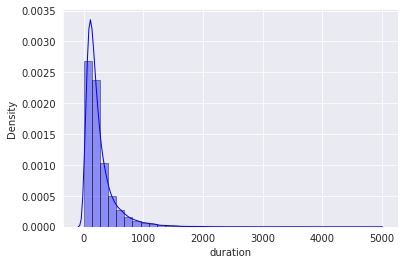

In [ ]:
sns.distplot(df['duration'], hist=True, kde=True,
 bins=int(180/5), color = 'blue',
 hist_kws={'edgecolor':'black'},
 kde_kws={'linewidth': 1})
plt.show()

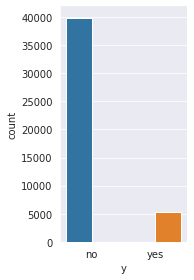

In [ ]:
sns.catplot(x="y", hue="y",
 data=df, kind="count",
 height=4, aspect=.7)
plt.show()

In [ ]:
# number of records with 'yes' label
n_yes= df[df.y=='yes'].shape[0]
# number of records with 'non' label
n_no = df[df.y=='no'].shape[0]
# print percentage of both examples
print(f'There is {n_yes} examples with yes label, which is {round(n_yes/df.shape[0],2)*100}%')
print(f'There is {n_no} examples with no label, which is {round(n_no/df.shape[0],2)*100}%')

There is 5289 examples with yes label, which is 12.0%
There is 39922 examples with no label, which is 88.0%


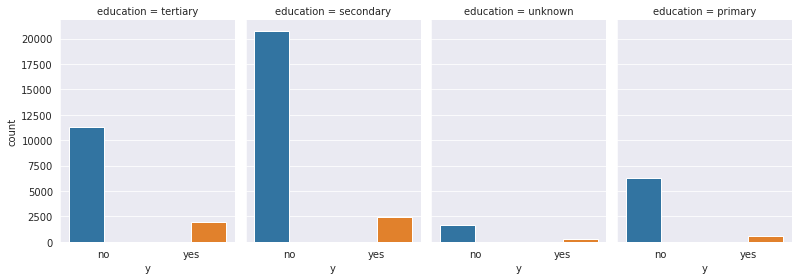

In [ ]:
sns.catplot(x="y", hue="y",col='education',
 data=df, kind="count",
 height=4, aspect=.7)
plt.show()

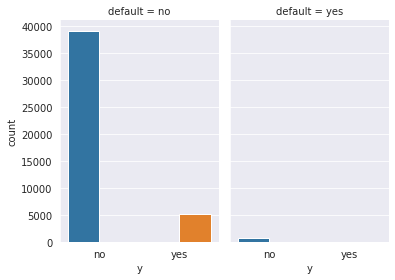

In [ ]:
sns.catplot(x="y", hue="y",col='default',
 data=df, kind="count",
 height=4, aspect=.7)
plt.show()

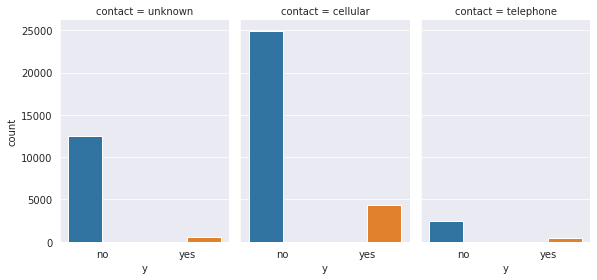

In [ ]:
sns.catplot(x="y", hue="y",col='contact',
 data=df, kind="count",
 height=4, aspect=.7)
plt.show()

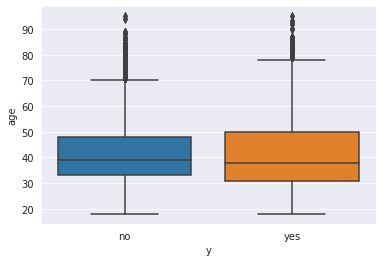

In [ ]:
sns.boxplot(x="y", y="age", data=df)
plt.show()

In [ ]:
corr_mat= df.corr()
corr_mat

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
# age attribute
corr_mat['age'].sort_values(ascending=False)

age         1.000000
balance     0.097783
campaign    0.004760
previous    0.001288
duration   -0.004648
day        -0.009120
pdays      -0.023758
Name: age, dtype: float64

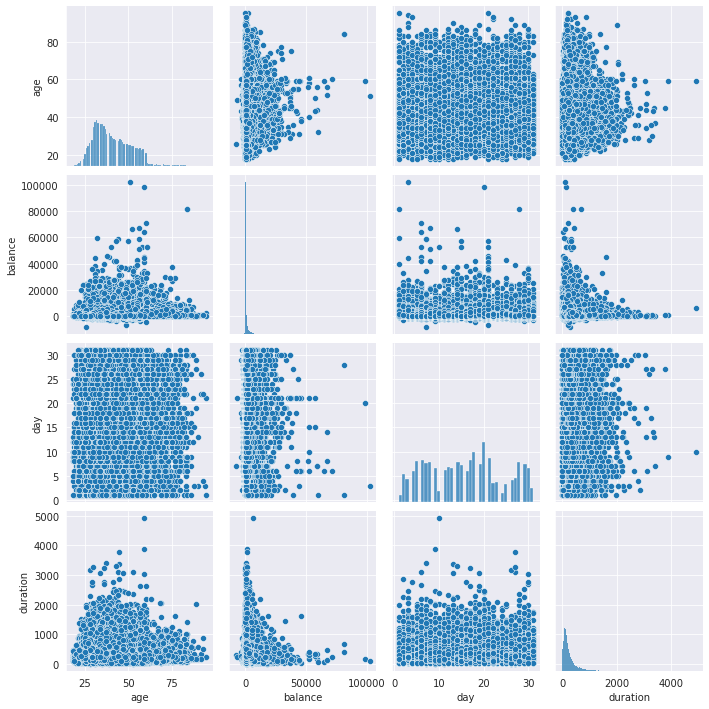

In [ ]:
# plot correlations between the first 4 numerical featrues
sns.pairplot(df[numerical_vals[:4]])
plt.show()

In [ ]:
 # first extract the categorical variables
cat_variables = set(df.columns)-set(numerical_vals)
# print the unique values for each cat variable
for i in cat_variables:
  print('Feature [',i, '] has unique values:',df[i].unique())

Feature [ marital ] has unique values: ['married' 'single' 'divorced']
Feature [ poutcome ] has unique values: ['unknown' 'failure' 'other' 'success']
Feature [ education ] has unique values: ['tertiary' 'secondary' 'unknown' 'primary']
Feature [ contact ] has unique values: ['unknown' 'cellular' 'telephone']
Feature [ job ] has unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Feature [ loan ] has unique values: ['no' 'yes']
Feature [ default ] has unique values: ['no' 'yes']
Feature [ month ] has unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Feature [ y ] has unique values: ['no' 'yes']
Feature [ housing ] has unique values: ['yes' 'no']


In [ ]:
# store all rows and columns apart from last column(label) in X
X = df.iloc[:,:(df.shape[1]-1)]
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=15)

In [ ]:
# stratify sampling on the y attribute
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=.20,random_state=15)
for train_index, test_index in split.split(df,df['y']):
   train_set = df.loc[train_index]
   test_set = df.loc[test_index]

In [ ]:
y_train.value_counts(normalize=True)

no     0.882216
yes    0.117784
Name: y, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

no     0.88621
yes    0.11379
Name: y, dtype: float64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
cat_variables

{'contact',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome',
 'y'}

In [ ]:
# print the unique values for each cat variable
for i in cat_variables:
   print('Feature [',i, '] has unique values:',df[i].unique())

Feature [ marital ] has unique values: ['married' 'single' 'divorced']
Feature [ poutcome ] has unique values: ['unknown' 'failure' 'other' 'success']
Feature [ education ] has unique values: ['tertiary' 'secondary' 'unknown' 'primary']
Feature [ contact ] has unique values: ['unknown' 'cellular' 'telephone']
Feature [ job ] has unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Feature [ loan ] has unique values: ['no' 'yes']
Feature [ default ] has unique values: ['no' 'yes']
Feature [ month ] has unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Feature [ y ] has unique values: ['no' 'yes']
Feature [ housing ] has unique values: ['yes' 'no']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()# instantiate a class
# code the feature called default which takes yes, no value
default_cat = df[['default']]
# encode the feature using one hot
default_one_hot = cat_encoder.fit_transform(default_cat)
default_one_hot

<45211x2 sparse matrix of type '<class 'numpy.float64'>'
	with 45211 stored elements in Compressed Sparse Row format>

In [ ]:
default_one_hot.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
cat_encoder.categories_

[array(['no', 'yes'], dtype=object)]

In [ ]:
#replace all cat variables with integers
df_encoded = pd.get_dummies(df, columns=[ 'contact','default','job','education', 'housing','loan','marital',
'month','poutcome'
])

In [ ]:
 # check first five rows and last 4 columns
df_encoded.iloc[:5,-4:]

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
def encode_variables():
# encode X_train
      X_train_e = pd.get_dummies(X_train, columns=[ 'contact','default','job','education', 'housing','loan','marital', 'month','poutcome'
])
      # encode Y_train
      X_test_e = pd.get_dummies(X_test, columns=[ 'contact','default','job','education', 'housing','loan','marital', 'month','poutcome'
])
      y_train.replace('no',0,inplace=True)
      y_train.replace('yes',1,inplace=True)
      y_test.replace('no',0,inplace=True)
      y_test.replace('yes',1,inplace=True)
      return X_train_e, X_test_e
     # now call the function above to encode all categorical variables including␣ , →labels
X_train, X_test = encode_variables()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 6379 to 7624
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  36168 non-null  int64
 1   balance              36168 non-null  int64
 2   day                  36168 non-null  int64
 3   duration             36168 non-null  int64
 4   campaign             36168 non-null  int64
 5   pdays                36168 non-null  int64
 6   previous             36168 non-null  int64
 7   contact_cellular     36168 non-null  uint8
 8   contact_telephone    36168 non-null  uint8
 9   contact_unknown      36168 non-null  uint8
 10  default_no           36168 non-null  uint8
 11  default_yes          36168 non-null  uint8
 12  job_admin.           36168 non-null  uint8
 13  job_blue-collar      36168 non-null  uint8
 14  job_entrepreneur     36168 non-null  uint8
 15  job_housemaid        36168 non-null  uint8
 16  job_management      

In [ ]:
small_df = df[['age','balance','previous']]
small_df.head()

,age,balance,previous
0,58,2143,0
1,44,29,0
2,33,2,0
3,47,1506,0
4,33,1,0


In [ ]:
# function to do min-max normalisation
def normalise(x):
    return (x -min(x))/(max(x)-min(x))
# create a copy of the small data frame (to be normalised)
small_df_n = small_df.copy(deep=True)
# scall features in the small_df_n
small_df_n[small_df_n.columns]=small_df_n[small_df_n.columns].apply(lambda x:normalise(x)).copy(deep=True)

In [ ]:
small_df_n.head()

,age,balance,previous
0,0.519481,0.092259,0.0
1,0.337662,0.073067,0.0
2,0.194805,0.072822,0.0
3,0.376623,0.086476,0.0
4,0.194805,0.072812,0.0


In [ ]:
# notice all columns now in one scale 0 to 1
small_df_n.describe()

,age,balance,previous
count,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.002110
std,0.137906,0.027643,0.008376
min,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.000000
50%,0.272727,0.076871,0.000000
75%,0.389610,0.085768,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
from sklearn import preprocessing
x = small_df.values #returns a numpy array
normaliser = preprocessing.MinMaxScaler()
x_scaled = normaliser.fit_transform(x)
small_df_n1 = pd.DataFrame(x_scaled)

In [ ]:
small_df_n1.describe()

,0,1,2
count,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.002110
std,0.137906,0.027643,0.008376
min,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.000000
50%,0.272727,0.076871,0.000000
75%,0.389610,0.085768,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
normalised_df=(small_df-small_df.mean())/small_df.std()

In [ ]:
normalised_df.describe()

,age,balance,previous
count,4.521100e+04,4.521100e+04,45211.000000
mean,2.011667e-16,1.760208e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000
min,-2.159970e+00,-3.081114e+00,-0.251938
25%,-7.473762e-01,-4.237673e-01,-0.251938
50%,-1.823386e-01,-3.002766e-01,-0.251938
75%,6.652178e-01,2.158719e-02,-0.251938
max,5.091346e+00,3.309441e+01,119.134665


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X_train)

In [ ]:
# store the data into dataframe called X_trains
X_train_s = pd.DataFrame(scaled, columns=X_train.columns)

In [ ]:
# scale the testing set
scaler = StandardScaler()
# transform data

scaled = scaler.fit_transform(X_test)

In [ ]:
# store the data into dataframe called X_trains
X_test_s = pd.DataFrame(scaled, columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
# create and train the model
# notice the class_weight parameter
ml_reg = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=4000)
ml_reg.fit(X_train_s,y_train)

LogisticRegression(class_weight='balanced', max_iter=4000)

In [ ]:
 # make predictions
y_preds = ml_reg.predict(X_test_s)

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is ',accuracy_score(y_test,y_preds))

Accuracy is  0.8403184783810682


In [ ]:
# Recall that majority of the data is with label 'no', imbalanced dataset, so␣ , →lets consider other metrics
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      8014
           1       0.40      0.80      0.53      1029

    accuracy                           0.84      9043
   macro avg       0.68      0.82      0.72      9043
weighted avg       0.91      0.84      0.86      9043



In [ ]:
# dictionary
dict_df = { 'Actual':y_test,
'Predictions':y_preds,
'Correct':0 }
results = pd.DataFrame(dict_df)
results.head()

,Actual,Predictions,Correct
41810,0,1,0
27628,0,0,0
9368,0,0,0
35436,0,0,0
43574,1,1,0


In [ ]:
# get false positives
FP = results[(results.Actual==0) & (results.Predictions==1)].shape[0]
FN = results[(results.Actual==1) & (results.Predictions==0)].shape[0]
TP = results[(results.Actual==1) & (results.Predictions==1)].shape[0]
TN = results[(results.Actual==0) & (results.Predictions==0)].shape[0]

In [ ]:
precision = TP/(TP+FN)
recall = TP/(TP+FP)
print(f'recall is {precision}')
print(f'precision is {recall}')

recall is 0.7988338192419825
precision is 0.3992229237493929


In [ ]:
 # import required libraries
from sklearn.metrics import roc_curve
# get false positive rates, true positive rates, for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

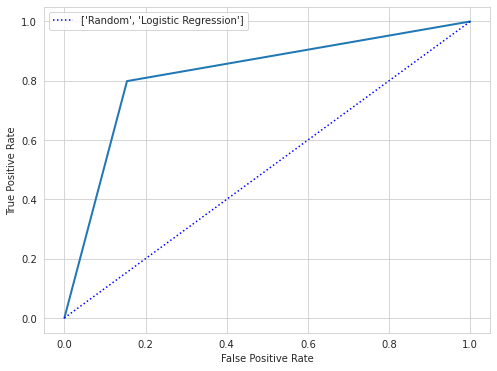

In [ ]:
#plot the roc curve
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'b:',label=['Random','Logistic Regression'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

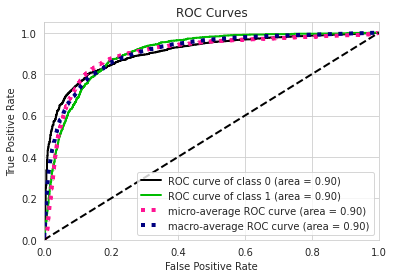

In [ ]:

import scikitplot as skplt
y_probas = ml_reg.predict_proba(X_test_s)
fig = skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# libraries for the various models we will be using
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
# Instantiate the classfiers and make a list
# notice the parameters for each classifie
classifiers =[LogisticRegression(solver='lbfgs',max_iter=4000,class_weight='balanced'),
DecisionTreeClassifier(random_state=15),
RandomForestClassifier(n_estimators=500,random_state=15) ]

In [ ]:
 # Define a result table as a DataFrame
results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and store the results
for cls in classifiers:
# fit the data
    model = cls.fit(X_train_s, y_train)
# get predictions as probabilities
# notice that predict_proba returns array (n_samples, n_classes)
    yproba = model.predict_proba(X_test_s)[::,1]
    fpr, tpr, thres = roc_curve(y_test, yproba)
# get the auc (area under the curve)
    auc = roc_auc_score(y_test, yproba)
# add results to the table
    results = results.append({'classifiers':cls.__class__.__name__, 'fpr':fpr,'tpr':tpr,
'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
results.set_index('classifiers', inplace=True)

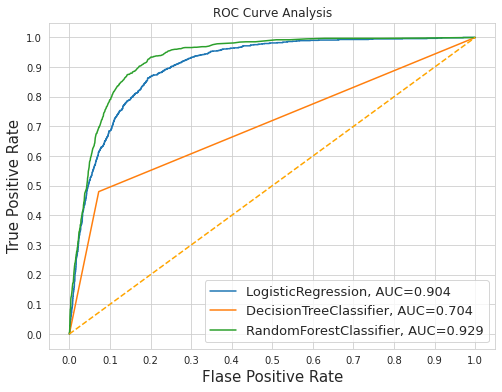

In [ ]:
fig = plt.figure(figsize=(8,6))
for i in results.index:
     plt.plot(results.loc[i]['fpr'],
             results.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, results.loc[i]['auc']))
# plot the random model (diagonal)
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontsize=12)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

the full example 

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# Load the data
df = pd.read_csv('/content/bank-full.csv',sep=';')

In [ ]:
 # store all rows and columns apart from last column(label) in X
X = df.iloc[:,:(df.shape[1]-1)]
y = df['y']

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=15)
# lets check the shapes of train/test sets
print(X_train.shape, X_test.shape)

(36168, 16) (9043, 16)


In [ ]:
# Numerical and categorical values
num_vars = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_vars = X_train.select_dtypes(include=['object', 'bool']).columns
print('Numerical Vars are ',num_vars)
print('Categorical vars are ',cat_vars)

Numerical Vars are  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Categorical vars are  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [ ]:
# data pre-processing: OneHotEncoder (for categorical variables)
# MinMax Scaler for numerical variables
pre_process = [('cat', OneHotEncoder(), cat_vars), ('num', MinMaxScaler(),num_vars)]
# use ColumnTransformer to apply the above pre-processing to the desired columns
cols_transform = ColumnTransformer(transformers=pre_process)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=15,
n_estimators=500,
max_features='sqrt',)

In [ ]:
# add pre-processing, model in one pipeline
rf_pipeline = Pipeline(steps=[('prep',cols_transform), ('m', model)])

In [ ]:
# encode the class labels
y_train.replace('no',0,inplace=True)
y_train.replace('yes',1,inplace=True)
y_test.replace('no',0,inplace=True)
y_test.replace('yes',1,inplace=True)

In [ ]:
# train the model
rf_train = rf_pipeline.fit(X_train,y_train)

In [ ]:
predictions = rf_pipeline.predict(X_test)
np.mean(predictions==y_test)

0.9044564856795311

In [ ]:
probs = rf_pipeline.predict_proba(X_test)
# probs of positive classes only
probs = probs[:, 1]
# compute auc score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.93


In [ ]:
type(rf_pipeline)

sklearn.pipeline.Pipeline

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC Curve')
    plt.legend()
    plt.show()

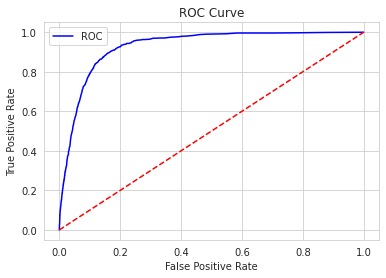

In [ ]:
# Plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)